<a href="https://colab.research.google.com/github/heyrobin/Medical-Expenses--ML/blob/main/Predicting_Medical_Expenses_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Data

In [60]:
#Downloading the Data
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

#library
from urllib.request import urlretrieve

#import csv from url
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fe48beab590>)

In [61]:
#installing library for dataframe
import pandas as pd

#creating dataframe from csv
medical = pd.read_csv('medical.csv')

In [62]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [63]:
#checking the dtypes and checking nulls
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
#checking the numerical stats
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
#EDA

In [66]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


THEME for Seaborn and Matplotlib

In [67]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

AGE - checking the distribution of ages

In [68]:
medical.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [69]:
fig_age = px.histogram(medical,
                x='age',
                nbins = 47,
                marginal='box',
                title = 'Distribution of Age')
fig_age.update_layout(bargap = 0.1)
fig_age.show()

Observation that there is unusual spikes on the age of 18 and 19

In [70]:
fig_bmi = px.histogram(medical,
                       x='bmi',
                       marginal ='box',
                       nbins = 100,
                       title = 'Distribution of bmi',
                       color_discrete_sequence=['Red'])
fig_bmi.update_layout(bargap = 0.1)
fig_bmi.show()

In [71]:
fig_charges= px.histogram(medical,
                          x= 'charges',
                          marginal = 'box',
                          nbins=100,
                          color='smoker',
                          color_discrete_sequence=['grey', 'green'],
                          title = 'distribution of charges')
fig_charges.update_layout(bargap = 0.1)
fig_charges.show()

In [72]:
fig_charges_sex= px.histogram(medical,
                          x= 'charges',
                          marginal = 'box',
                          nbins=100,
                          color='sex',
                          color_discrete_sequence=['orange', 'green'],
                          title = 'distribution of charges with sex')
fig_charges_sex.update_layout(bargap = 0.1)
fig_charges_sex.show()

In [73]:
fig_charges_region= px.histogram(medical,
                          x= 'charges',
                          marginal = 'box',
                          nbins=100,
                          color='region',
                          color_discrete_sequence=['red', 'orange','yellow','green'],
                          title = 'distribution of charges with region')
fig_charges_region.update_layout(bargap = 0.1)
fig_charges_region.show()

**Smoker** :
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [74]:
medical.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [75]:
px.histogram(medical,
             x='smoker',
             color='sex',
             title = 'Smoker by Sex')

In [76]:
px.histogram(medical,
             x = 'sex',
             color = 'smoker')

In [77]:
children_smoker = px.histogram(medical,
             x = 'children',
             color = 'smoker')
children_smoker.update_layout( bargap = 0.1)

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [78]:
fig = px.scatter(medical,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'], 
                 title = 'Age vs. Charges')
fig.show()

We can make the follwing observations from the above charts:

* the general trend seems to be the medical charges increases with the age, as observation. However there is a significant variation at every age, and age alone cannot be used to accurately determine medical charges.

* we can see there are three clusters which seems to form a line with a increasing slope.


1.   The primary and the largest cluster is the "Non smokers" charges increases with the age have the low medical charges compared to other clusters
2.   The second cluster consists of non smokers and non smokers. with the smokers with the health issues and non smokers without major health issues.
3.   The third cluster consist "Smokers" with major health issues have the highest medical charges.
4.   The none of the "non smokers" lies inside the third cluster shows the heavy smokers seems to pay higher medical charges than the non smokers and light smokers.



###BMI and Charges


In [79]:
fig = px.scatter(medical,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 title='BMI vs. Charges')
fig.show()

 charges are significantly higher for smokers with bmi of 30 or above 

In [80]:
fig  = px.violin(medical,
          x= 'children',
          y= 'charges',
          title = 'charges Vs. children', box=True,color_discrete_sequence=['green']
          )

fig.show()

The person with less children have the higher charges

In [81]:
fig = px.violin(medical,
          x= 'sex',
          y= 'charges',
          title = 'charges Vs. Sex', box=True,color_discrete_sequence=['orange']
          )

fig.show()

Male and Female has not much diffrence in charges and median 9.3 abd 9.4

In [82]:
    fig = px.violin(medical,
          x= 'smoker',
          y= 'charges',
          title = 'charges Vs. Smoker', box=True,color_discrete_sequence=['grey']
          )

fig.show()

The smokers have the higher median of 35.4 and the charges are higher than the charges of "non-smoker" with median of 7.34

# Correlation

* Correlation of numerical values (bmi,age,charges and children)

In [83]:
medical.charges.corr(medical.age)

0.2990081933306476

In [84]:
medical.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* Correlation of the categorical values(sex,smoker and region)

convert the categorical values to numerical values

In [85]:
smoker_values = {"no":0, 'yes' :1}
smoker_num = medical.smoker.map(smoker_values)
medical.charges.corr(smoker_num)

0.787251430498478

In [86]:
sex_values = {"male":1,"female": 0 }
sex_num = medical.sex.map(sex_values)
medical.charges.corr(sex_num)

0.057292062202025484

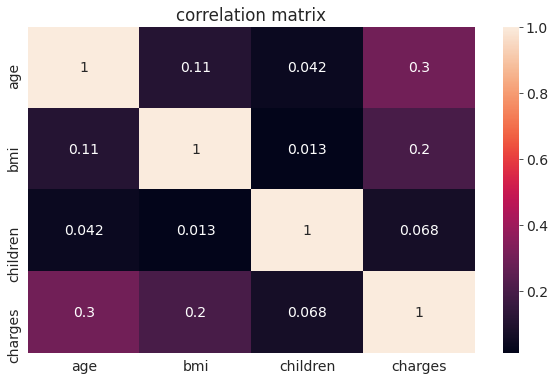

In [87]:
sns.heatmap(medical.corr(), annot=True)
plt.title('correlation matrix');

# Linear Regression using a Single Feature

In [88]:
non_smokers = medical[medical.smoker == 'no']

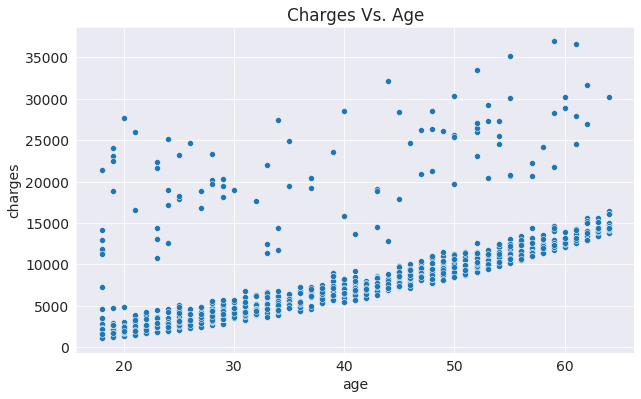

In [89]:
plt.title("Charges Vs. Age")
sns.scatterplot(data = non_smokers, x = 'age', y = 'charges');

y = m x + b;
m = slope, b = intercept

> charges = m x age + b



In [90]:
def estimate_charges(age,w,b):
  return w * age + b

In [91]:
w = 50
b = 100
estimate_charges(60,w,b)

3100

In [92]:
ages = medical.age
estimate_charge = estimate_charges(ages,w,b)

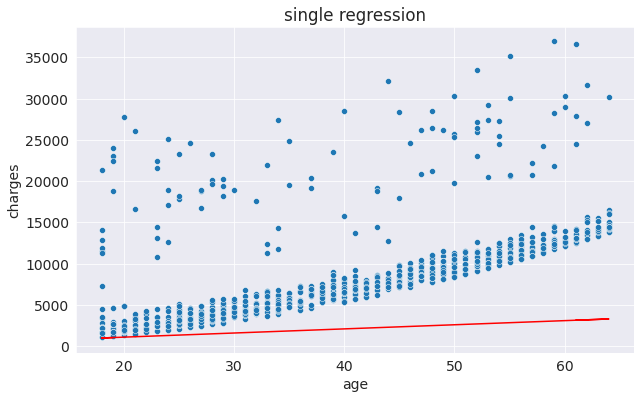

In [93]:
plt.title('single regression')
sns.scatterplot(data = non_smokers, x = 'age', y='charges');
plt.plot(ages,estimate_charge,'r');

In [94]:
def try_parameters(w,b):
  ages = non_smokers.age
  target = non_smokers.charges

  estimate_charge = estimate_charges(ages,w,b)

  plt.plot(ages,estimate_charge,'r')
  sns.scatterplot(y= target, x = ages)
  plt.legend(['estimate','Actual'])

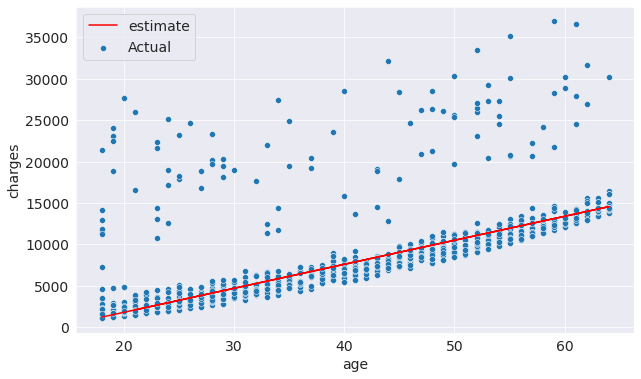

In [95]:
try_parameters(290,-4000)

# Loss/Cost Function
* the diffrence between target and prediction is called Residual
* Squaring all the values for the positive value
* Taking the average of the mean
* Take the square root of the result

## the result will be called the Root Mean Squared Error (RMSE)

In [96]:
import numpy as np

In [97]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [98]:
w = 50
b = 100

In [99]:
targets = non_smokers.charges
predicted = estimate_charges(non_smokers.age,w,b)

In [100]:
rmse(targets,predicted)

8461.949562575488

In [101]:
def try_parameters(w,b):
  ages = non_smokers.age
  targets = non_smokers.charges
  predictions = estimate_charges(ages,w,b)

  sns.scatterplot(x= ages, y = targets)
  plt.plot(ages,predictions, 'r')

  loss = rmse(targets,predictions)
  print("Rmse Loss :", loss)

Rmse Loss : 4706.55521953607


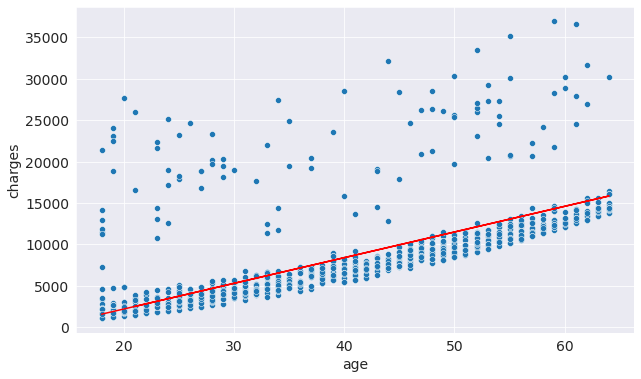

In [102]:
try_parameters(310,-4000)

# Linear Regression Model using scikitlearn

## using single value

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression()

In [105]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [106]:
inputs = non_smokers[['age']]
targets = non_smokers.charges
print('array shape :', inputs.shape)
print('array shape :', targets.shape)

array shape : (1064, 1)
array shape : (1064,)


In [107]:
model.fit(inputs, targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
#testing the predict function of linear regression by passing the dummy numpy array
model.predict(np.array([[23],[37],[61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [109]:
predictions = model.predict(inputs)

In [110]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [111]:
#checking the error (loss)
rmse(predictions,targets)

4662.505766636391

In [112]:
model.coef_

array([267.24891283])

In [113]:
model.intercept_

-2091.4205565650864

Rmse Loss : 4662.505766636391


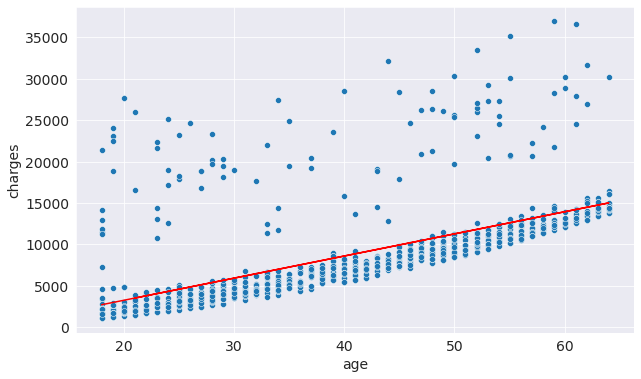

In [114]:
try_parameters(model.coef_,model.intercept_)

In [119]:
# few lines of code to train a machine learning model using scikit-learn.

#create inputs and targets

inputs,targets = non_smokers[['age']],non_smokers['charges']

#tain the model
model = LinearRegression().fit(inputs,targets)

#Generate Prediction
predictions = model.predict(inputs)
print('Prediction :', predictions)

#generate Error
loss = rmse(targets, predictions)
print('Loss :', loss)

Prediction : [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Loss : 4662.505766636391


# using multiple values

In [121]:
#create inputs and targets
inputs,targets = non_smokers[['age','bmi']],non_smokers['charges']

#training the model
model = LinearRegression().fit(inputs,targets)

#Generating the prediction
predictions = model.predict(inputs)

#generating the error
loss = rmse(targets,predictions)
print('loss :', loss)

loss : 4662.312835461298


In [117]:
fig = px.scatter_3d(non_smokers, x= 'age', y = 'bmi', z = 'charges')
fig.update_traces(marker_size = 3,marker_opacity = 0.5)
fig.show()

In [122]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [129]:
inputs,targets = non_smokers[['bmi']],non_smokers['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print(loss)

5969.772531913287


In [130]:
model.coef_,model.intercept_

(array([83.35055766]), 5879.424081872974)

In [136]:
inputs,targets = non_smokers[['age','bmi','children']], non_smokers['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print(loss)

4608.470405038245


In [144]:
# smokers

smokers = medical[medical.smoker == 'yes']

inputs,targets = smokers[['age','bmi','children']], smokers['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print(loss)

5718.202480524153


In [143]:
inputs,targets = medical[['age','bmi','children']], medical['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print(loss)

11355.317901125969
